$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 3: Activation Functions

Zach Goodenow <br>
3/1/18 <br>
CS 445 <br>

## Overview

In this assignment, I made a new version of my `NeuralNetwork` class from assignment 2.  This new version extends `NeuralNetwork` but overrides the `activation` and `activationDerivative` functions to be the Rectified Linear Unit (ReLU).

I then went on to look at the training and testing performances of networks with the ReLU activation function as compared to networks with tanh.

- <a href="#relu"> NeuralNetworkReLU Class </a>
- <a href="#p"> partition function </a>
- <a href="#edat"> tanh & ReLU networks on energy data </a>
- <a href="#plot"> RMSE Plot </a>
- <a href="#ec"> Extra Credit </a>

<a id="relu"></a>
### NeuralNetworkReLU

I started with the `NeuralNetwork` class defined in my `neuralnetworksA2.py` file from assignment 2.  I defined a new class named `NeuralNetworkReLU` that extends `NeuralNetwork` and simply defines new implementations of `activation` and `activationDerivative` that implement the ReLU activation function.

I thought it might come in handy to easily know which activation function was used to make the network.  To do this, I changed the string reputation (`__repr__`) of the `NeuralNetworkReLU` class.  Now, if a network was made with the `ReLU` function, printing the network will start with "NeuralNetworkReLU" rather than "NeuralNetwork".  A simple example is shown below for both.

In [21]:
# from neuralnetworksA2 import NeuralNetwork
# from NeuralNetworkReLU import NeuralNetworkReLU

In [3]:
from neuralnetworksA2 import NeuralNetwork
import numpy as np

class NeuralNetworkReLU(NeuralNetwork):

    def __repr__(self):
        str = 'NeuralNetworkReLU({}, {}, {})'.format(self.ni, self.nhs, self.no)
        # str += '  Standardization parameters' + (' not' if self.Xmeans == None else '') + ' calculated.'
        if self.trained:
            str += '\n   Network was trained for {} iterations that took {:.4f} seconds. Final error is {}.'.format(self.numberOfIterations, self.getTrainingTime(), self.errorTrace[-1])
        else:
            str += '  Network is not trained.'
        return str

    # Override activation function to implement the ReLU activation function
    def activation(self, weighted_sum):
        return np.maximum(weighted_sum, 0)

    # Override activationDerivative function to implement the ReLU activation function
    def activationDerivative(self, activation_value):
        return np.minimum(np.maximum(activation_value, 0), 1)

In [4]:
X = np.arange(10).reshape((-1,1))
T = np.sin(X)

nnet = NeuralNetwork(1, [10], 1)
nnet.train(X, T, 100)
nnet

NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.1332 seconds. Final error is 0.03065178157690856.

In [5]:
nnetReLU = NeuralNetworkReLU(1, [10], 1)
nnetReLU.train(X, T, 100)
nnetReLU

NeuralNetworkReLU(1, [10], 1)
   Network was trained for 101 iterations that took 0.0503 seconds. Final error is 0.29760695254588004.

### Comparison

<a id="p"></a>
I defined a new function called `partition` that is used to partition data into Xtrain, Ttrain, Xtest, and Ttest data.  The function takes in 4 values:

    1. X data to be partitioned
    2. T data to be partitioned
    3. Percent of data to be used as train (ex: 0.8 would be 80% of the data in train and the other 20% in test)
    4. shuffle - a boolean value indicating if the data should be put in random order before making partitions
    

In [6]:
# from partition import partition

In [7]:
import numpy as np
import pandas as pd

In [8]:
# If shuffle=True is used as an argument, then the samples are randomly rearranged before the partitions are formed.
def partition(X, T, cut, shuffle=False):
    nRows = X.shape[0]
    rows = np.arange(nRows) # used as indices
    if shuffle:
        np.random.shuffle(rows)
    nTrain = int(nRows * cut)
    trainRows = rows[:nTrain]
    testRows = rows[nTrain:]
    Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
    Xtest, Ttest = X[testRows, :], T[testRows, :]
    return Xtrain, Ttrain, Xtest, Ttest

In [9]:
X = np.arange(10*2).reshape((10, 2))
T = X[:, 0:1] * 0.1

In [10]:
X

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [11]:
T

array([[ 0. ],
       [ 0.2],
       [ 0.4],
       [ 0.6],
       [ 0.8],
       [ 1. ],
       [ 1.2],
       [ 1.4],
       [ 1.6],
       [ 1.8]])

In [12]:
Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, shuffle=False)

In [13]:
Xtrain

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15]])

In [14]:
Ttrain

array([[ 0. ],
       [ 0.2],
       [ 0.4],
       [ 0.6],
       [ 0.8],
       [ 1. ],
       [ 1.2],
       [ 1.4]])

In [15]:
Xtest

array([[16, 17],
       [18, 19]])

In [16]:
Ttest

array([[ 1.6],
       [ 1.8]])

If ```shuffle=True``` is used as an argument, then the samples are randomly rearranged before the partitions are formed.

In [17]:
Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, shuffle=True)

In [18]:
Xtrain

array([[10, 11],
       [18, 19],
       [ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [12, 13],
       [16, 17],
       [ 6,  7]])

In [19]:
Ttrain

array([[ 1. ],
       [ 1.8],
       [ 0. ],
       [ 0.2],
       [ 0.4],
       [ 1.2],
       [ 1.6],
       [ 0.6]])

In [20]:
Xtest

array([[14, 15],
       [ 8,  9]])

In [21]:
Ttest

array([[ 1.4],
       [ 0.8]])

**ENERGY DATA**

I used the `energydata_complete.csv` data for the following comparisons. I loaded this data using pandas, then created matrix $X$ using all columns except `['date','Appliances', 'rv1', 'rv2']` and created $T$ using just 'Appliances'.

In [31]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"
edata = np.array(pd.read_csv(url, usecols = range(1, 27)))
edata.shape

(19735, 26)

In [32]:
T = edata[:, :1].astype(np.float) # First column is Appliances
X = edata[:, 1:].astype(np.float) # Rest of columns are X data
T.shape, X.shape

((19735, 1), (19735, 25))

I will need to compute the RMSE for the networks I train so I define this function to use when needed.

In [24]:
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

<a id="edat"></a>
The following algorithm explains what I did to train multiple networks and compare their accuracy with different hidden layer structures.  

  - For each of the two activation functions, ```tanh```, and ```ReLU```:
      - For each hidden layer structure in [[u]*nl for u in [1, 2, 5, 10, 50] for nl in [1, 2, 3, 4, 5, 10]]:
          - Repeat 10 times:
              - Randomly partition the data into training set with 80% of samples and testing set with other 20%.
              - Create a neural network using the given activation function and hidden layer structure.
              - Train the network for 100 iterations.
              - Calculate two RMS errors, one on the training partition and one on the testing partitions.
          - Calculate the mean of the training and testing RMS errors over the 10 repetitions.

To make this process more usable, I put the main ideas of the algorithm into a function that can be used with any combination of network options.  I added steps to collect the data on errors so I could plot and analyze them.

In [34]:
def getAvgError(nnetClass, X, T, repeat=10, trainPct=0.8, iterations=100):
    errors = []
    for struct in [[u]*nl for u in [1, 2, 5, 10, 50] for nl in [1, 2, 3, 4, 5, 10]]:
        trainRMSE = []
        testRMSE = []
        for _ in range(repeat):
            Xtrain, Ttrain, Xtest, Ttest = partition(X, T, trainPct, shuffle=True)
            nnet = nnetClass(Xtrain.shape[1], struct, Ttrain.shape[1])
            nnet.train(Xtrain, Ttrain, iterations)
            trainRMSE.append(rmse(Ttrain, nnet.use(Xtrain)))
            testRMSE.append(rmse(Ttest, nnet.use(Xtest)))
        errors.append([struct, sum(trainRMSE)/float(len(trainRMSE)), sum(testRMSE)/float(len(testRMSE))])
    return errors

In [35]:
tanhErrors = getAvgError(NeuralNetwork, X, T)
tanhErrors

[[[1], 92.761197968777552, 92.437658876951687],
 [[1, 1], 92.846110583426224, 92.135294032354167],
 [[1, 1, 1], 92.892719461734259, 91.999600793565079],
 [[1, 1, 1, 1], 92.395179112373484, 94.114964398056983],
 [[1, 1, 1, 1, 1], 92.982570001794556, 93.052917799904236],
 [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 96.829828933179414, 96.916208507979363],
 [[2], 91.243408937269606, 92.063234444315611],
 [[2, 2], 91.102215911837504, 91.28745502141166],
 [[2, 2, 2], 91.315727275478693, 89.95924501040723],
 [[2, 2, 2, 2], 91.42215126467093, 90.166415418560746],
 [[2, 2, 2, 2, 2], 90.703167280586456, 93.367053983811388],
 [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 93.348893252336353, 93.070172229995137],
 [[5], 89.20307124414299, 89.201554666304133],
 [[5, 5], 87.32574077031299, 90.621954404419881],
 [[5, 5, 5], 86.859848958023235, 91.151009745181156],
 [[5, 5, 5, 5], 88.001591797912937, 89.774796169646535],
 [[5, 5, 5, 5, 5], 88.163821112898717, 90.158732191829159],
 [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 90.19295070

In [36]:
ReLUErrors = getAvgError(NeuralNetworkReLU, X, T)
ReLUErrors

[[[1], 94.179542976403624, 94.450849566048888],
 [[1, 1], 99.877613902542492, 100.94055155262893],
 [[1, 1, 1], 99.852278757756523, 98.356377683398918],
 [[1, 1, 1, 1], 102.72608395308998, 101.51282906560672],
 [[1, 1, 1, 1, 1], 102.75884642576784, 101.55252409313508],
 [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 102.30925299143857, 103.23177282871066],
 [[2], 92.878519117003378, 95.587974298732718],
 [[2, 2], 95.417603163025149, 94.917074644002881],
 [[2, 2, 2], 97.89020797619483, 97.612780186430996],
 [[2, 2, 2, 2], 102.3290250468234, 102.32028477784893],
 [[2, 2, 2, 2, 2], 102.4990830213674, 101.43840901551917],
 [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 102.62604675554671, 102.08669126464743],
 [[5], 90.172582263979237, 91.720621279246558],
 [[5, 5], 92.463230037064861, 93.86541260095342],
 [[5, 5, 5], 95.541638639663859, 95.799693970635047],
 [[5, 5, 5, 5], 98.903563264572554, 98.365605894309667],
 [[5, 5, 5, 5, 5], 101.36416348330528, 102.86278726267945],
 [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 102.601470

<a id="plot"></a>
**PLOT ERRORS**

The following plot contains RMS errors versus the hidden layer structure. Plot includes four curves, for the training and testing RMS errors for each of the two activation functions. 

In this plot I can see that the `tanh` activation function networks tend to preform better than that of the `ReLU` activation function.  I also notice that the `ReLU` function has a positive correlation between number of layers in the hidden layer structure and RMSE values.  On the other hand, `tanh` networks dont have a clear correlation between number of layers and RMSE.  

Interestingly, `ReLU` networks also show a negative correlation between the number of nodes in each layer and RMSE values. This negative correlation is also present in `tanh` networks.  

The hidden layer structures that produce similar RMSE values for both activation functions are structures with 1 or 2 layers.  To further investigate this behavior I will replicate the process but with hidden layer structures that have more nodes in each layer.  

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

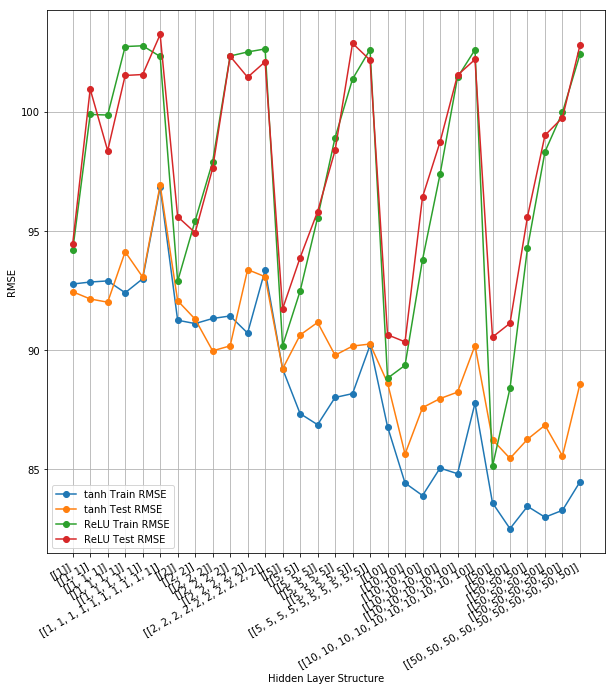

In [37]:
tanhErrors = pd.DataFrame(tanhErrors)
ReLUErrors = pd.DataFrame(ReLUErrors)
plt.figure(figsize=(10, 10))
plt.plot(tanhErrors.values[:, 1:], 'o-')
plt.plot(ReLUErrors.values[:, 1:], 'o-')
plt.legend(('tanh Train RMSE', 'tanh Test RMSE', 'ReLU Train RMSE', 'ReLU Test RMSE'))
plt.xticks(range(tanhErrors.shape[0]), tanhErrors.values[:,:1], rotation=30, horizontalalignment='right')
plt.xlabel('Hidden Layer Structure')
plt.ylabel('RMSE')
plt.grid(True)

Here, I modified the function to take in `structures` as a list of hidden layer structures to apply to the data.  I also put in some print statements so I could tell where the process was since it takes so long to train the networks.

In [64]:
def getAvgError(nnetClass, X, T, structures, repeat=10, trainPct=0.8, iterations=100):
    errors = []
    for struct in structures: # [[u]*nl for u in [1, 2, 5, 10, 50] for nl in [1, 2, 3, 4, 5, 10]]:
        print('Starting struct', struct)
        trainRMSE = []
        testRMSE = []
        for i in range(repeat):
            print(i, ', ', end="")
            Xtrain, Ttrain, Xtest, Ttest = partition(X, T, trainPct, shuffle=True)
            nnet = nnetClass(Xtrain.shape[1], struct, Ttrain.shape[1])
            nnet.train(Xtrain, Ttrain, iterations)
            trainRMSE.append(rmse(Ttrain, nnet.use(Xtrain)))
            testRMSE.append(rmse(Ttest, nnet.use(Xtest)))
        errors.append([struct, sum(trainRMSE)/float(len(trainRMSE)), sum(testRMSE)/float(len(testRMSE))])
        print()
    return errors

In [65]:
hiddens = [[u]*nl for u in [100, 200, 300] for nl in [1,2,3,4,10]]

In [66]:
tanhErrors = getAvgError(NeuralNetwork, X, T, hiddens, repeat=5)
tanhErrors

Starting struct [100]
0 , 1 , 2 , 3 , 4 , 
Starting struct [100, 100]
0 , 1 , 2 , 3 , 4 , 
Starting struct [100, 100, 100]
0 , 1 , 2 , 3 , 4 , 
Starting struct [100, 100, 100, 100]
0 , 1 , 2 , 3 , 4 , 
Starting struct [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
0 , 1 , 2 , 3 , 4 , 
Starting struct [200]
0 , 1 , 2 , 3 , 4 , 
Starting struct [200, 200]
0 , 1 , 2 , 3 , 4 , 
Starting struct [200, 200, 200]
0 , 1 , 2 , 3 , 4 , 
Starting struct [200, 200, 200, 200]
0 , 1 , 2 , 3 , 4 , 
Starting struct [200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
0 , 1 , 2 , 3 , 4 , 
Starting struct [300]
0 , 1 , 2 , 3 , 4 , 
Starting struct [300, 300]
0 , 1 , 2 , 3 , 4 , 
Starting struct [300, 300, 300]
0 , 1 , 2 , 3 , 4 , 
Starting struct [300, 300, 300, 300]
0 , 1 , 2 , 3 , 4 , 
Starting struct [300, 300, 300, 300, 300, 300, 300, 300, 300, 300]
0 , 1 , 2 , 3 , 4 , 


[[[100], 83.465636616528172, 86.585166157340879],
 [[100, 100], 84.082199645704407, 87.397043308197041],
 [[100, 100, 100], 84.565067277942546, 85.792584179929577],
 [[100, 100, 100, 100], 84.905100782344533, 87.23752979935955],
 [[100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
  85.566102578916116,
  89.04239011667012],
 [[200], 83.490546873368999, 87.754819005648159],
 [[200, 200], 83.943995981563702, 86.923916520404006],
 [[200, 200, 200], 84.717714407663067, 87.756434221231473],
 [[200, 200, 200, 200], 85.119928049385067, 87.055758086526097],
 [[200, 200, 200, 200, 200, 200, 200, 200, 200, 200],
  85.89282454746477,
  88.715926195335186],
 [[300], 83.306945581448005, 86.306094775712438],
 [[300, 300], 85.012336022140857, 85.882214601153763],
 [[300, 300, 300], 85.602443318097414, 85.903528125631198],
 [[300, 300, 300, 300], 85.382374794249628, 87.203924683723841],
 [[300, 300, 300, 300, 300, 300, 300, 300, 300, 300],
  86.443613058160992,
  88.512828143824635]]

In [67]:
ReLUErrors = getAvgError(NeuralNetworkReLU, X, T, hiddens, repeat=5)
ReLUErrors

Starting struct [100]
0 , 1 , 2 , 3 , 4 , 
Starting struct [100, 100]
0 , 1 , 2 , 3 , 4 , 
Starting struct [100, 100, 100]
0 , 1 , 2 , 3 , 4 , 
Starting struct [100, 100, 100, 100]
0 , 1 , 2 , 3 , 4 , 
Starting struct [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
0 , 1 , 2 , 3 , 4 , 
Starting struct [200]
0 , 1 , 2 , 3 , 4 , 
Starting struct [200, 200]
0 , 1 , 2 , 3 , 4 , 
Starting struct [200, 200, 200]
0 , 1 , 2 , 3 , 4 , 
Starting struct [200, 200, 200, 200]
0 , 1 , 2 , 3 , 4 , 
Starting struct [200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
0 , 1 , 2 , 3 , 4 , 
Starting struct [300]
0 , 1 , 2 , 3 , 4 , 
Starting struct [300, 300]
0 , 1 , 2 , 3 , 4 , 
Starting struct [300, 300, 300]
0 , 1 , 2 , 3 , 4 , 
Starting struct [300, 300, 300, 300]
0 , 1 , 2 , 3 , 4 , 
Starting struct [300, 300, 300, 300, 300, 300, 300, 300, 300, 300]
0 , 1 , 2 , 3 , 4 , 


[[[100], 86.454340810297793, 87.897324225333108],
 [[100, 100], 88.408653856994135, 88.216569294318191],
 [[100, 100, 100], 93.18367511326359, 97.712251259790506],
 [[100, 100, 100, 100], 96.395998811680329, 97.950004627908072],
 [[100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
  101.8829002816081,
  104.69563105650477],
 [[200], 86.683036295638345, 89.25744558569518],
 [[200, 200], 86.723813645088143, 90.189585333777387],
 [[200, 200, 200], 93.892929815114499, 93.30183674827353],
 [[200, 200, 200, 200], 94.953621682461048, 94.025423291878681],
 [[200, 200, 200, 200, 200, 200, 200, 200, 200, 200],
  102.16345825779987,
  103.30413298356942],
 [[300], 86.650607258671698, 90.275341714324583],
 [[300, 300], 87.381505747528564, 88.200343132361297],
 [[300, 300, 300], 92.593403351097166, 94.842429875627431],
 [[300, 300, 300, 300], 95.544452282553138, 95.452473066203225],
 [[300, 300, 300, 300, 300, 300, 300, 300, 300, 300],
  102.12434626266334,
  103.4211551691014]]

The following plot follows the same pattern between activation function for RMSE values.  The reason why I wanted to get this data and plot it was to see if the RMSE would decrease any more with large amounts of nodes in each layer. 

After looking at this data, it is safe to assume that increasing the number of nodes in each layer of the hidden layer structure does not significantly decrease the RMSE of the network.  All RMSE values for tanh test were between 85 and 90 which was the lowest values for that of the previous plot.  The RMSE values for ReLU might have gotten slightly smaller but not more than 2-3.  

Given that these networks took much longer to train, I would avoid using these hidden layer structures since they dont seem to improve the model much.  

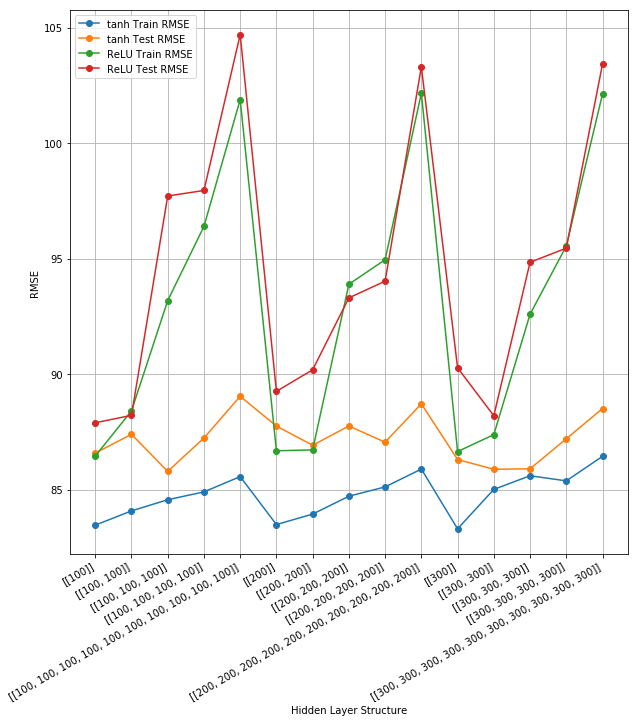

In [68]:
tanhErrors = pd.DataFrame(tanhErrors)
ReLUErrors = pd.DataFrame(ReLUErrors)
plt.figure(figsize=(10, 10))
plt.plot(tanhErrors.values[:, 1:], 'o-')
plt.plot(ReLUErrors.values[:, 1:], 'o-')
plt.legend(('tanh Train RMSE', 'tanh Test RMSE', 'ReLU Train RMSE', 'ReLU Test RMSE'))
plt.xticks(range(tanhErrors.shape[0]), tanhErrors.values[:,:1], rotation=30, horizontalalignment='right')
plt.xlabel('Hidden Layer Structure')
plt.ylabel('RMSE')
plt.grid(True)

**CONCLUSION**

The data observed in the previous plots and tests supports the claim that the `tanh` activation function created better performing networks than networks using the `ReLU` activation function.  However, that claim is specific to this energy data and cannot be extended to all data.  The `ReLU` activation function might preform better on a different set of data if it has behavior that is more similar to `ReLU` than `tanh`.

The "sweet spot" of hidden layer structure for `tanh` is a single layer with 10 nodes or 2 layers with 50 nodes in each.  I will go on to look at number of iterations in the extra credit section.  But from this, I can conclude that the "sweet spot" for number of iterations is around 200 iterations.

The "sweet spot" of hidden layer structure for `ReLU` is a 1 or 2 layers with 10 or 50 nodes in each layer.  Similarly, the extra credit section of this notebook finds that 300-400 iterations is satisfactory for training ReLU networks.

## Extra Credit

<div class="alert alert-block alert-info">
Run additional experiments using different numbers of training iterations.  How do the relative performances of the three activation functions depend on numbers of training iterations?  This will earn one extra credit point.

You may also earn an extra credit point by creating yet another version of the neural network class, called ```NeuralNetworkSwish``` and repeat the above comparisons.  You may set the constant $\beta = 1$.  This is tricker than it sounds, because the Swish activation derivative requires the weighted sum as an argument, but our other two activation function derivatives did not.

<a id="ec"></a>
### DIFFERENT NUMBERS OF TRAINING ITERATIONS

I modified the previous function I made to loop through different number of iterations rather than hidden structures.  I used a hidden layer structure of `[5, 5]` so that the training wouldn't take very long and because both activation functions had small RMSE values that where somewhat similar to one another with this structure.  

In [57]:
def getAvgError_iters(nnetClass, X, T, structure, iterationL, repeat=10, trainPct=0.8):
    errors = []
    for numIts in iterationL: 
        print('\nStarting iteration', numIts)
        trainRMSE = []
        testRMSE = []
        for i in range(repeat):
            print(i, ', ', end="")
            Xtrain, Ttrain, Xtest, Ttest = partition(X, T, trainPct, shuffle=True)
            nnet = nnetClass(Xtrain.shape[1], structure, Ttrain.shape[1])
            nnet.train(Xtrain, Ttrain, numIts)
            trainRMSE.append(rmse(Ttrain, nnet.use(Xtrain)))
            testRMSE.append(rmse(Ttest, nnet.use(Xtest)))
        errors.append([numIts, sum(trainRMSE)/float(len(trainRMSE)), sum(testRMSE)/float(len(testRMSE))])
    return errors

In [58]:
tanhErrors = getAvgError_iters(NeuralNetwork, X, T, [5, 5], [10, 25, 50, 75, 100, 200, 300, 400, 500])
print(tanhErrors)
ReLUErrors = getAvgError_iters(NeuralNetworkReLU, X, T, [5, 5], [10, 25, 50, 75, 100, 200, 300, 400, 500])
print(ReLUErrors)


Starting iteration 10
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 25
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 50
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 75
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 100
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 200
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 300
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 400
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 500
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , [[10, 97.615952662040144, 99.089032651393197], [25, 93.353635515587115, 94.579686009564242], [50, 89.58356869021965, 90.563195136893711], [75, 88.564921851499633, 91.067953099725699], [100, 87.385419243776397, 88.708132745070159], [200, 85.332610020533565, 88.963381230619774], [300, 84.084014760682393, 88.485956479512623], [400, 83.505814161933301, 90.181929042939558], [500, 83.371057214945935, 89.754925284741617]]

Starting

This plot shows that the RMSE improves from both activation functions as the number of training iterations increases.  This doesnt mean that the RMSE will continue to decrease infinitely though.  There is a point at which the RMSE will not decrease as the weights trained in each network have reached their "maximum potential".  You can see in this plot that the RMSE starts to flatten out around 200-300.  If I were to run the number of iterations up to 10000, the lines would likely flatten.  

An interesting aspect to this plot is that the Train RMSE for tanh is consistently the lowest RMSE.  This is because there is more data for the network to train on, hence, producing a more accurate result.  Because the ReLU activation function basically ignores negative values, it might be more inaccurate compared to that of tanh because a negative value might help the network.

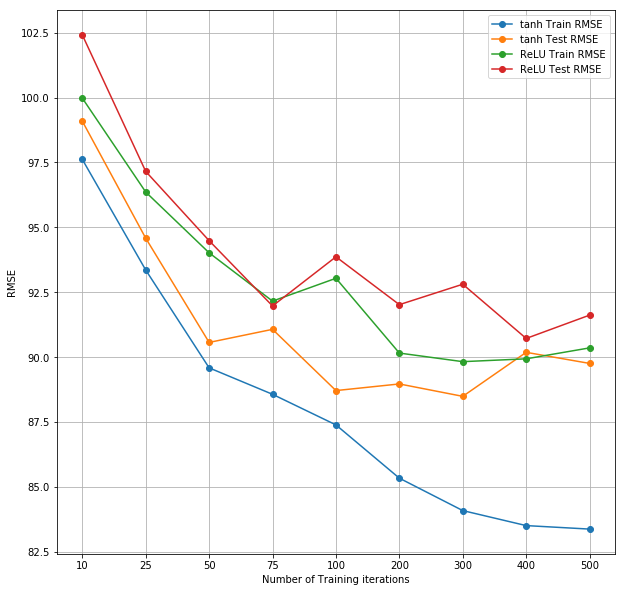

In [60]:
tanhErrors = pd.DataFrame(tanhErrors)
ReLUErrors = pd.DataFrame(ReLUErrors)
plt.figure(figsize=(10, 10))
plt.plot(tanhErrors.values[:, 1:], 'o-')
plt.plot(ReLUErrors.values[:, 1:], 'o-')
plt.legend(('tanh Train RMSE', 'tanh Test RMSE', 'ReLU Train RMSE', 'ReLU Test RMSE'))
plt.xticks(range(tanhErrors.shape[0]), [10, 25, 50, 75, 100, 200, 300, 400, 500])
plt.xlabel('Number of Training iterations')
plt.ylabel('RMSE')
plt.grid(True)

**APPLY TO INCREASING LAYER STRUCTURES**

To further this investigation, I will apply the same list of iterations to an increasing layer structure with 10 nodes in each layer.  This will reveille if there is an association between number of layers and iterations from the perspective of RMSE.  Maybe a network with more layers needs to be trained more than one with less layers to produce similar RMSE values.  I will do this for tanh networks then again for ReLU networks.

** *tanh* **

In [69]:
tanhHLS1 = getAvgError_iters(NeuralNetwork, X, T, [10], [10, 25, 50, 75, 100, 200, 300, 400, 500])
tanhHLS2 = getAvgError_iters(NeuralNetwork, X, T, [10, 10], [10, 25, 50, 75, 100, 200, 300, 400, 500])
tanhHLS3 = getAvgError_iters(NeuralNetwork, X, T, [10, 10, 10], [10, 25, 50, 75, 100, 200, 300, 400, 500])
tanhHLS4 = getAvgError_iters(NeuralNetwork, X, T, [10, 10, 10, 10], [10, 25, 50, 75, 100, 200, 300, 400, 500])
tanhHLS5 = getAvgError_iters(NeuralNetwork, X, T, [10, 10, 10, 10, 10], [10, 25, 50, 75, 100, 200, 300, 400, 500])


Starting iteration 10
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 25
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 50
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 75
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 100
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 200
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 300
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 400
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 500
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 10
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 25
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 50
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 75
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 100
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 200
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 300
0 , 1 , 2 , 3 , 4 , 5 , 

This plot shows that all hidden layer structures tend to improve their RMSE as the network gets trained more.  But around 200 iterations is when more training iterations dont seam to improve the RMSE.  Test RMSEs for each layer structure reached a low RMSE of about 87 which would tell me that that increasing the number of layers isnt essential to decreasing RMSE.  

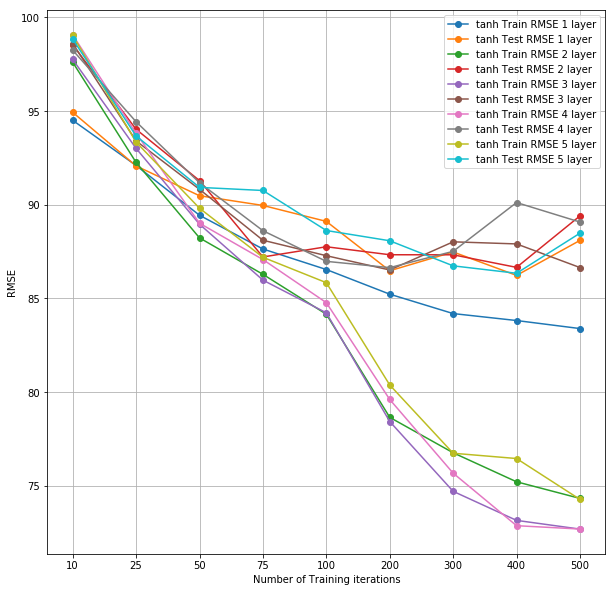

In [70]:
tanhHLS1 = pd.DataFrame(tanhHLS1)
tanhHLS2 = pd.DataFrame(tanhHLS2)
tanhHLS3 = pd.DataFrame(tanhHLS3)
tanhHLS4 = pd.DataFrame(tanhHLS4)
tanhHLS5 = pd.DataFrame(tanhHLS5)

plt.figure(figsize=(10, 10))
plt.plot(tanhHLS1.values[:, 1:], 'o-')
plt.plot(tanhHLS2.values[:, 1:], 'o-')
plt.plot(tanhHLS3.values[:, 1:], 'o-')
plt.plot(tanhHLS4.values[:, 1:], 'o-')
plt.plot(tanhHLS5.values[:, 1:], 'o-')
plt.legend(('tanh Train RMSE 1 layer', 'tanh Test RMSE 1 layer', 
           'tanh Train RMSE 2 layer', 'tanh Test RMSE 2 layer',
           'tanh Train RMSE 3 layer', 'tanh Test RMSE 3 layer',
           'tanh Train RMSE 4 layer', 'tanh Test RMSE 4 layer',
           'tanh Train RMSE 5 layer', 'tanh Test RMSE 5 layer',))
plt.xticks(range(tanhHLS1.shape[0]), [10, 25, 50, 75, 100, 200, 300, 400, 500])
plt.xlabel('Number of Training iterations')
plt.ylabel('RMSE')
plt.grid(True)

** *ReLU* **

In [71]:
ReLUHLS1 = getAvgError_iters(NeuralNetworkReLU, X, T, [10], [10, 25, 50, 75, 100, 200, 300, 400, 500])
ReLUHLS2 = getAvgError_iters(NeuralNetworkReLU, X, T, [10, 10], [10, 25, 50, 75, 100, 200, 300, 400, 500])
ReLUHLS3 = getAvgError_iters(NeuralNetworkReLU, X, T, [10, 10, 10], [10, 25, 50, 75, 100, 200, 300, 400, 500])
ReLUHLS4 = getAvgError_iters(NeuralNetworkReLU, X, T, [10, 10, 10, 10], [10, 25, 50, 75, 100, 200, 300, 400, 500])
ReLUHLS5 = getAvgError_iters(NeuralNetworkReLU, X, T, [10, 10, 10, 10, 10], [10, 25, 50, 75, 100, 200, 300, 400, 500])


Starting iteration 10
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 25
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 50
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 75
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 100
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 200
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 300
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 400
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 500
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 10
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 25
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 50
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 75
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 100
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 200
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 
Starting iteration 300
0 , 1 , 2 , 3 , 4 , 5 , 

This plot also shows that all hidden layer structures tend to improve their RMSE as the network gets trained more. But unlike the plot for `tanh`, this plot has more variation between hidden layer structures.  1 2 and 3 layers produced the lowest RMSE for testing.  Each structure seems to reach max potential around 300-400 iterations with low RMSE values being 87-90.  

An intersting aspect of this plot that is not in the `tanh` plot is that the 4 and 5 layer structure networks continue to decrease their RMSE when the other networks start to flatten out.  This could mean that networks with more layers require more training iterations.  I would be interested to see how the RMSE changes if the 4 and 5 layer structures are trained for 1000 or more iterations.  I would predict that the RMSE would decrease past the value for 500 iterations but it would not grow smaller than the minimum for 1, 2, or 3 layer networks (about 90).

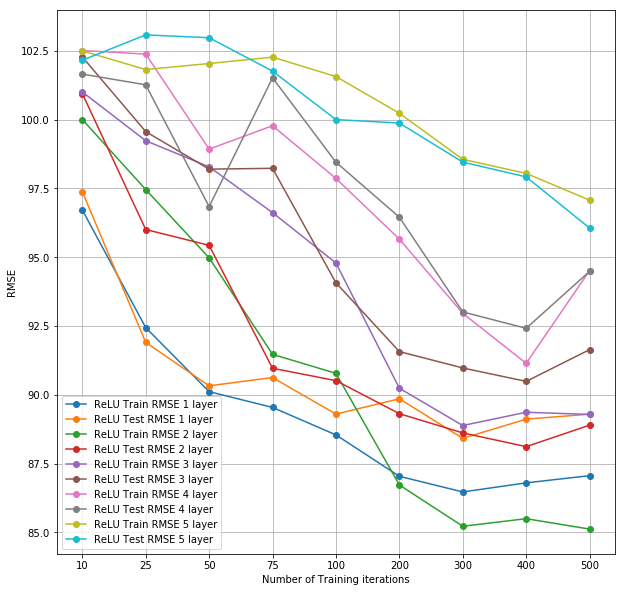

In [72]:
ReLUHLS1 = pd.DataFrame(ReLUHLS1)
ReLUHLS2 = pd.DataFrame(ReLUHLS2)
ReLUHLS3 = pd.DataFrame(ReLUHLS3)
ReLUHLS4 = pd.DataFrame(ReLUHLS4)
ReLUHLS5 = pd.DataFrame(ReLUHLS5)

plt.figure(figsize=(10, 10))
plt.plot(ReLUHLS1.values[:, 1:], 'o-')
plt.plot(ReLUHLS2.values[:, 1:], 'o-')
plt.plot(ReLUHLS3.values[:, 1:], 'o-')
plt.plot(ReLUHLS4.values[:, 1:], 'o-')
plt.plot(ReLUHLS5.values[:, 1:], 'o-')
plt.legend(('ReLU Train RMSE 1 layer', 'ReLU Test RMSE 1 layer', 
           'ReLU Train RMSE 2 layer', 'ReLU Test RMSE 2 layer',
           'ReLU Train RMSE 3 layer', 'ReLU Test RMSE 3 layer',
           'ReLU Train RMSE 4 layer', 'ReLU Test RMSE 4 layer',
           'ReLU Train RMSE 5 layer', 'ReLU Test RMSE 5 layer',))
plt.xticks(range(ReLUHLS1.shape[0]), [10, 25, 50, 75, 100, 200, 300, 400, 500])
plt.xlabel('Number of Training iterations')
plt.ylabel('RMSE')
plt.grid(True)

In [34]:
Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, shuffle=True)
nnet = NeuralNetworkReLU(Xtrain.shape[1], [10, 10, 10, 10, 10], Ttrain.shape[1])
nnet.train(Xtrain, Ttrain, 1000)
print('train rmse:', rmse(Ttrain, nnet.use(Xtrain)))
print('test rmse:', rmse(Ttest, nnet.use(Xtest)))

train rmse: 100.302806627
test rmse: 102.870598292


In [35]:
Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, shuffle=True)
nnet = NeuralNetworkReLU(Xtrain.shape[1], [10, 10, 10, 10, 10], Ttrain.shape[1])
nnet.train(Xtrain, Ttrain, 600)
print('train rmse:', rmse(Ttrain, nnet.use(Xtrain)))
print('test rmse:', rmse(Ttest, nnet.use(Xtest)))

train rmse: 93.9971660106
test rmse: 93.0722245427


In [36]:
Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, shuffle=True)
nnet = NeuralNetworkReLU(Xtrain.shape[1], [10, 10, 10, 10, 10], Ttrain.shape[1])
nnet.train(Xtrain, Ttrain, 700)
print('train rmse:', rmse(Ttrain, nnet.use(Xtrain)))
print('test rmse:', rmse(Ttest, nnet.use(Xtest)))

train rmse: 94.7659392224
test rmse: 95.7880532389


In [37]:
Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, shuffle=True)
nnet = NeuralNetworkReLU(Xtrain.shape[1], [10, 10, 10, 10, 10], Ttrain.shape[1])
nnet.train(Xtrain, Ttrain, 800)
print('train rmse:', rmse(Ttrain, nnet.use(Xtrain)))
print('test rmse:', rmse(Ttest, nnet.use(Xtest)))

train rmse: 98.0334644877
test rmse: 95.2557636517
